# 다중분류 - 아이리스

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 2023
np.random.seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [4]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(iris.target)
y_onehot.shape

(150, 3)

In [5]:
y_onehot[0], y_onehot[50], y_onehot[100]

(array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
)

## 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

- 모델 정의
    - 출력층의 노드 갯수와 활성화 함수

In [8]:
model = Sequential([ 
    Dense(12, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


- 모델 설정
    - loss 함수: categorical crossentropy

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 콜백 함수 정리 후 학습

In [10]:
model_path = 'best_model.h5'
mc = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=20)
hist = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=2000, batch_size=100, verbose=0, 
                   callbacks=[mc, es])


Epoch 1: val_loss improved from inf to 1.16358, saving model to best_model.h5

Epoch 2: val_loss improved from 1.16358 to 1.15359, saving model to best_model.h5

Epoch 3: val_loss improved from 1.15359 to 1.14372, saving model to best_model.h5

Epoch 4: val_loss improved from 1.14372 to 1.13397, saving model to best_model.h5

Epoch 5: val_loss improved from 1.13397 to 1.12434, saving model to best_model.h5

Epoch 6: val_loss improved from 1.12434 to 1.11483, saving model to best_model.h5

Epoch 7: val_loss improved from 1.11483 to 1.10543, saving model to best_model.h5

Epoch 8: val_loss improved from 1.10543 to 1.09615, saving model to best_model.h5

Epoch 9: val_loss improved from 1.09615 to 1.08700, saving model to best_model.h5

Epoch 10: val_loss improved from 1.08700 to 1.07796, saving model to best_model.h5

Epoch 11: val_loss improved from 1.07796 to 1.06905, saving model to best_model.h5

Epoch 12: val_loss improved from 1.06905 to 1.06025, saving model to best_model.h5

Epoc

- 평가

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.2584 - accuracy: 0.9333


[0.2584382891654968, 0.9333333373069763]

- 시각화

In [12]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

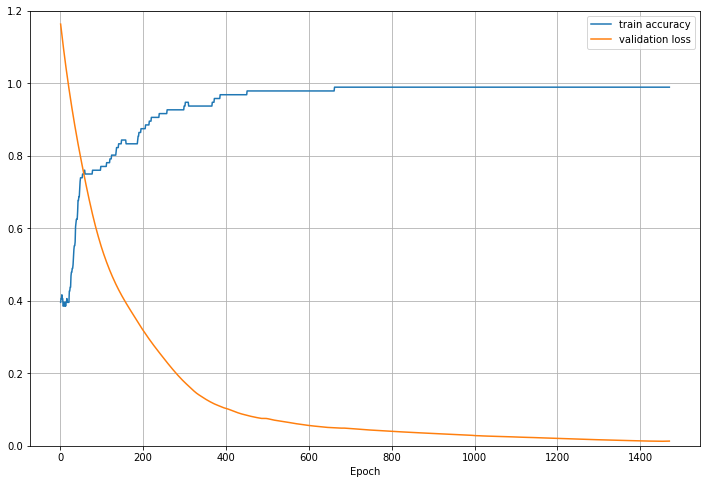

In [13]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()